In [1]:
import numpy as np
path = '../../afqmc_cisd_data'#Path to afqmc_cisd_data
mols = ["H2","CH","CH2","NH","CH3","NH2","OH","HF",
        "H2O","NH3","C2H","CN","C2H2","CO","HCN","N2",
        "HCO","CF","NO","HNO","O2","HO2","OF","H2O2","F2","CO2"]
data_dic = {}
with open(path+"/heat/ene.dz.txt") as f:
    for line in f:
        parts = line.split()
        species = parts[0]
        data_dic[species] = {}
        data_dic[species]["ccsdt"] = float(parts[1])
        data_dic[species]["ccsdt[q]"] = float(parts[2])
        data_dic[species]["ccsdt(q)"] = float(parts[3])
        data_dic[species]["ccsdtq"] = float(parts[4])
        data_dic[species]["ccsdtqp"] = float(parts[5])

ref = np.array([data_dic[mol]["ccsdtqp"] for mol in mols])
ccsdtq = np.array([data_dic[mol]["ccsdtq"] for mol in mols])

data = np.loadtxt(path+"/heat/ene.txt", delimiter=",")
afqmc_hf = (data[:, 1] - ref) * 1000
# afqmc_hf_rmsd = np.sqrt(np.mean((afqmc_hf) \*\* 2))
afqmc_hf_err = data[:, 2]# * 1000
# ccsdtq = (ccsdtq - ref) _ 1000
# ccsdtq_rmsd = np.sqrt(np.mean((ccsdtq) \*\* 2))
# ccsdpt = (data[:, 4] - ref) _ 1000
# ccsdpt_rmsd = np.sqrt(np.mean((ccsdpt) ** 2))
afqmc_cisd = (data[:, 5] - ref) * 1000
# afqmc_cisd_rmsd = np.sqrt(np.mean((afqmc_cisd) ** 2))
afqmc_cisd_err = data[:, 6]

for i,mol in enumerate(mols):
    data_dic[mol]["afqmc_hf"] = data[i, 1]
    data_dic[mol]["afqmc_cisd"] = data[i, 5]

In [2]:
my_data = '''
#   Mol          CCSD(T)              AFQMC/CCSD_PT                  AFQMC/CCSD_PT2
    C2H       -76.39855638        -76.399014 +/- 0.000051       -76.399562 +/- 0.000058
    C2H2      -77.10924902        -77.109546 +/- 0.000064       -77.109680 +/- 0.000115
    CF        -137.4748482        -137.475760 +/- 0.000192      -137.475671 +/- 0.000156
    CH        -38.37935551        -38.380189 +/- 0.000024       -38.379985 +/- 0.000011
    CH2       -39.04119570        -39.041474 +/- 0.000006       -39.041480 +/- 0.000007
    CH3       -39.71553966        -39.715980 +/- 0.000010       -39.715982 +/- 0.000011
    CN        -92.48869527        -92.487483 +/- 0.000157       -92.490868 +/- 0.000417 (-92.490273 +/- 0.000163)
    CO        -113.0544306        -113.055092 +/- 0.000092      -113.054777 +/- 0.000109
    CO2       -188.1474293        -188.148924 +/- 0.000137      -188.148620 +/- 0.000120
    F2        -199.0963839        -199.098269 +/- 0.000057      -199.098891 +/- 0.000077
    H2        -1.163426264        -1.163426 +/- 0.000001         -1.163423 +/- 0.000001
    H2O       -76.24101779        -76.241701 +/- 0.000038       -76.241738 +/- 0.000062
    H2O2      -151.1936301        -151.194724 +/- 0.000058      -151.194733 +/- 0.000060
    HCN       -93.18832063        -93.189107 +/- 0.000157       -93.188920 +/- 0.000157
    HCO       -113.5757054        -113.576087 +/- 0.000097      -113.575954 +/- 0.000145
    HF        -100.2281312        -100.228669 +/- 0.000031      -100.228645 +/- 0.000032
    HNO       -130.1696778        -130.172789 +/- 0.000079      -130.172245 +/- 0.000218 (-130.172028 +/- 0.000074)
    HO2       -150.5584809        -150.559452 +/- 0.000056      -150.559348 +/- 0.000056
    N2        -109.2752986        -109.276029 +/- 0.000140      -109.275833 +/- 0.000121
    NH        -55.09129056        -55.091499 +/- 0.000007       -55.091517 +/- 0.000018
    NH2       -55.73250631        -55.732956 +/- 0.000013       -55.732938 +/- 0.000013
    NH3       -56.40191327        -56.402489 +/- 0.000029       -56.402502 +/- 0.000031
    NO        -129.5977782        -129.598245 +/- 0.000077      -129.597858 +/- 0.000095
    O2        -149.9856842        -149.985698 +/- 0.000084      -149.985707 +/- 0.000076
    OF        -174.4979237        -174.498355 +/- 0.000059      -174.498380 +/- 0.000174 (-174.498199 +/- 0.000062)
    OH        -75.55923331        -75.559572 +/- 0.000015       -75.559586 +/- 0.000016
'''

In [3]:
for line in my_data.splitlines():
    if not line.startswith('#'):
        if len(line) > 0 :
            mol = line.split()[0]
            ccsd_t = line.split()[1]
            afqmc_ccsd_pt = line.split()[2]
            afqmc_ccsd_pt_err = line.split()[4]
            afqmc_ccsd_pt2 = line.split()[5]
            afqmc_ccsd_pt2_err = line.split()[7]
            data_dic[mol]["ccsd(t)"] = float(ccsd_t)
            data_dic[mol]["afqmc_ccsd_pt"] = float(afqmc_ccsd_pt)
            data_dic[mol]["afqmc_ccsd_pt_err"] = float(afqmc_ccsd_pt_err)
            data_dic[mol]["afqmc_ccsd_pt2"] = float(afqmc_ccsd_pt2)
            data_dic[mol]["afqmc_ccsd_pt2_err"] = float(afqmc_ccsd_pt2_err)

In [4]:
ccsd_t = []
ccsdtqp = []
afqmc_hf = []
afqmc_cisd = []
afqmc_ccsd_pt = []
afqmc_ccsd_pt_err = []
afqmc_ccsd_pt2 = []
afqmc_ccsd_pt2_err = []
for mol in mols:
    ccsd_t = np.hstack((ccsd_t,data_dic[mol]['ccsd(t)']))
    ccsdtqp = np.hstack((ccsdtqp,data_dic[mol]['ccsdtqp']))
    afqmc_hf = np.hstack((afqmc_hf,data_dic[mol]['afqmc_hf']))
    afqmc_cisd = np.hstack((afqmc_cisd,data_dic[mol]['afqmc_cisd']))
    afqmc_ccsd_pt = np.hstack((afqmc_ccsd_pt,data_dic[mol]['afqmc_ccsd_pt']))
    afqmc_ccsd_pt_err = np.hstack((afqmc_ccsd_pt_err,data_dic[mol]['afqmc_ccsd_pt_err']))
    afqmc_ccsd_pt2 = np.hstack((afqmc_ccsd_pt2,data_dic[mol]['afqmc_ccsd_pt2']))
    afqmc_ccsd_pt2_err = np.hstack((afqmc_ccsd_pt2_err,data_dic[mol]['afqmc_ccsd_pt2_err']))

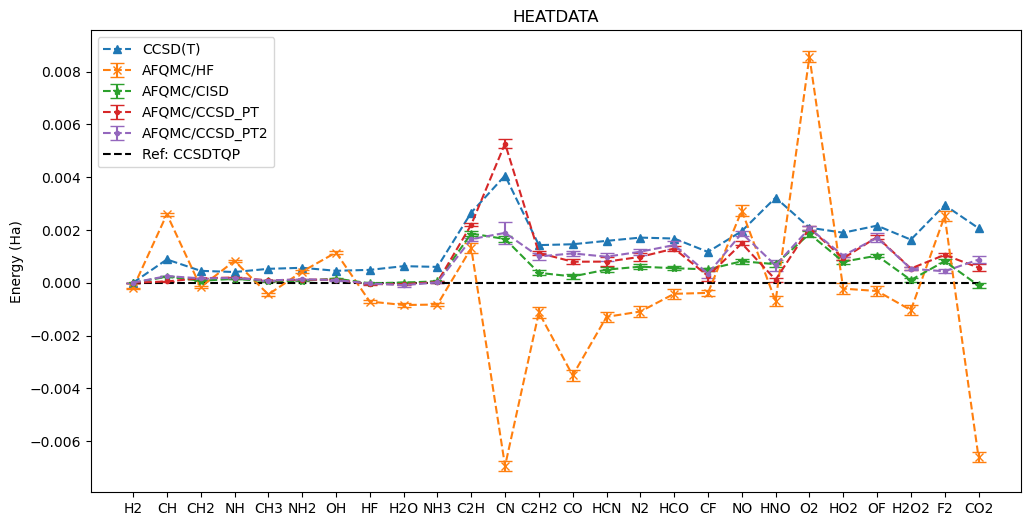

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(mols,ccsd_t-ccsdtqp,'^--',color='C0',label='CCSD(T)')
plt.errorbar(mols, afqmc_hf-ccsdtqp, yerr=afqmc_hf_err, fmt='x--', color='C1', capsize=5, label='AFQMC/HF')
plt.errorbar(mols, afqmc_cisd-ccsdtqp, yerr=afqmc_cisd_err,fmt='*--',color='C2', capsize=5, label='AFQMC/CISD')
plt.errorbar(mols, afqmc_ccsd_pt-ccsdtqp, yerr=afqmc_ccsd_pt_err, fmt='.--', color='C3', capsize=5, label='AFQMC/CCSD_PT')
plt.errorbar(mols, afqmc_ccsd_pt2-ccsdtqp, yerr=afqmc_ccsd_pt2_err, fmt='.--', color='C4', capsize=5, label='AFQMC/CCSD_PT2')
plt.plot(mols,[0]*len(mols),'--',color='black',label='Ref: CCSDTQP')
plt.ylabel('Energy (Ha)')
plt.title('HEATDATA')
handles, labels = plt.gca().get_legend_handles_labels()
order = ['CCSD(T)', 'AFQMC/HF', 'AFQMC/CISD', 'AFQMC/CCSD_PT', 'AFQMC/CCSD_PT2', 'Ref: CCSDTQP']
ordered_handles = [handles[labels.index(l)] for l in order]
ordered_labels = order
plt.legend(ordered_handles, ordered_labels,loc='upper left')
plt.show()

In [22]:
import numpy as np
n_mol = len(mols)
ccsd_t_msd = np.sqrt(np.sum((ccsd_t-ccsdtqp)**2)/n_mol)*1000
afqmc_hf_msd = np.sqrt(np.sum((afqmc_hf-ccsdtqp)**2)/n_mol)*1000
afqmc_cisd_msd = np.sqrt(np.sum((afqmc_cisd-ccsdtqp)**2)/n_mol)*1000
afqmc_ccsd_pt_msd = np.sqrt(np.sum((afqmc_ccsd_pt-ccsdtqp)**2)/n_mol)*1000
afqmc_ccsd_pt2_msd = np.sqrt(np.sum((afqmc_ccsd_pt2-ccsdtqp)**2)/n_mol)*1000
afqmc_hf_msd_err = np.sqrt(sum(afqmc_hf_err**2)/n_mol)*1000
afqmc_cisd_msd_err = np.sqrt(sum(afqmc_cisd_err**2)/n_mol)*1000
afqmc_ccsd_pt_msd_err = np.sqrt(sum(afqmc_ccsd_pt_err**2)/n_mol)*1000
afqmc_ccsd_pt2_msd_err = np.sqrt(sum(afqmc_ccsd_pt2_err**2)/n_mol)*1000
print('HEAT DATA ')
print(f'CCSD(T) RMSD from Ref {ccsd_t_msd:.2f} mHa')
print(f'AFQMC/HF RMSD from Ref {afqmc_hf_msd:.2f} +/- {afqmc_hf_msd_err:.2f} mHa')
print(f'AFQMC/CISD RMSD from Ref {afqmc_cisd_msd:.2f} +/- {afqmc_cisd_msd_err:.2f}  mHa')
print(f'AFQMC/CCSD_PT RMSD from Ref {afqmc_ccsd_pt_msd:.2f} +/- {afqmc_ccsd_pt_msd_err:.2f} mHa')
print(f'AFQMC/CCSD_PT2 RMSD from Ref {afqmc_ccsd_pt2_msd:.2f} +/- {afqmc_ccsd_pt2_msd_err:.2f} mHa')

HEAT DATA 
CCSD(T) RMSD from Ref 1.79 mHa
AFQMC/HF RMSD from Ref 2.84 +/- 0.16 mHa
AFQMC/CISD RMSD from Ref 0.75 +/- 0.07  mHa
AFQMC/CCSD_PT RMSD from Ref 1.39 +/- 0.08 mHa
AFQMC/CCSD_PT2 RMSD from Ref 1.01 +/- 0.13 mHa
